In [55]:
import re
import matplotlib.pyplot as plt
from collections import defaultdict

In [56]:
data_path = "data/"

In [57]:
with open(data_path+"_chat.txt") as file:
    data = [line.strip() for line in file.readlines()]
data[:10]

['25/6/15, 1:42:12 AM: \u200eVishnu Gaud created this group',
 '25/6/15, 1:42:12 AM: \u200eYou were added',
 '18/12/16, 1:57:38 AM: Shahain: <\u200eimage omitted>',
 '21/12/16, 9:54:46 PM: Pankaj Sinha: <\u200eimage omitted>',
 '21/12/16, 9:57:45 PM: Shahain: Wow',
 '21/12/16, 10:48:51 PM: Sakshi: <\u200eimage omitted>',
 '21/12/16, 10:49:00 PM: Sakshi: <\u200eimage omitted>',
 '21/12/16, 10:50:12 PM: Neha Wipro: Awsum😀😀👍🏼👍🏼',
 '21/12/16, 10:51:21 PM: Sakshi: 🙈',
 '21/12/16, 10:57:01 PM: Ganguly: 🙂🙂👍🏻👍🏻']

Make multi-line messages in single line

In [58]:
i = 2
j = 0
sdata = []
while i<len(data):
    ap = data[i].split(" ")
    try :
        if ap[2] == "AM:" or ap[2] == "PM:":
            sdata.append(data[i])
            j+=1
            i+=1
        else:
            sdata[j-1] = sdata[j-1] +" "+ data[i]
            i+=1
    except:
        #print(i," ",j)
        sdata[j-1] = sdata[j-1] +" "+ data[i]
        #print(data[i])
        i+=1

In [59]:
data = sdata

In [60]:
line = "21/12/16, 9:54:46 PM: Pankaj Sinha: <\u200eimage omitted>"
line.split(" ")[2]

'PM:'

Remove left to right Unicode

In [61]:
data  = [ re.sub("\u200e", "", line) for line in data]
data[:10]

['18/12/16, 1:57:38 AM: Shahain: <image omitted>',
 '21/12/16, 9:54:46 PM: Pankaj Sinha: <image omitted>',
 '21/12/16, 9:57:45 PM: Shahain: Wow',
 '21/12/16, 10:48:51 PM: Sakshi: <image omitted>',
 '21/12/16, 10:49:00 PM: Sakshi: <image omitted>',
 '21/12/16, 10:50:12 PM: Neha Wipro: Awsum😀😀👍🏼👍🏼',
 '21/12/16, 10:51:21 PM: Sakshi: 🙈',
 '21/12/16, 10:57:01 PM: Ganguly: 🙂🙂👍🏻👍🏻',
 '21/12/16, 11:28:51 PM: Vishnu Gaud: Waste out of wealth 😂',
 '21/12/16, 11:48:42 PM: Venu Wipro: Fancy dress competition?']

Segrigate Emojis from text

In [62]:
data[:10]

['18/12/16, 1:57:38 AM: Shahain: <image omitted>',
 '21/12/16, 9:54:46 PM: Pankaj Sinha: <image omitted>',
 '21/12/16, 9:57:45 PM: Shahain: Wow',
 '21/12/16, 10:48:51 PM: Sakshi: <image omitted>',
 '21/12/16, 10:49:00 PM: Sakshi: <image omitted>',
 '21/12/16, 10:50:12 PM: Neha Wipro: Awsum😀😀👍🏼👍🏼',
 '21/12/16, 10:51:21 PM: Sakshi: 🙈',
 '21/12/16, 10:57:01 PM: Ganguly: 🙂🙂👍🏻👍🏻',
 '21/12/16, 11:28:51 PM: Vishnu Gaud: Waste out of wealth 😂',
 '21/12/16, 11:48:42 PM: Venu Wipro: Fancy dress competition?']

In [63]:
emoji_pattern = re.compile("["
                            u"\U0001F600-\U0001F64F"  
                            u"\U0001F300-\U0001F5FF"  
                            u"\U0001F680-\U0001F6FF"  
                            u"\U0001F1E0-\U0001F1FF" 
                            u"\U00002500-\U00002BEF"  
                            u"\U00002702-\U000027B0"
                            u"\U00002702-\U000027B0"
                            u"\U000024C2-\U0001F251"
                            u"\U0001f926-\U0001f937"
                            u"\U00010000-\U0010ffff"
                            u"\u2640-\u2642"
                            u"\u2600-\u2B55"
                            u"\u200d"
                            u"\u23cf"
                            u"\u23e9"
                            u"\u231a"
                            u"\ufe0f"  
                            u"\u3030"
                            "]+", flags=re.UNICODE)


In [64]:
emodata = []
for line in data:
    emojis = re.findall(emoji_pattern,line)
    if emojis:
        try:
            name = line.split(":")[3].strip()
        except:
            pass
        emodata.append([name,emojis])
    

In [66]:
emodata[:45]

[['Neha Wipro', ['😀😀👍🏼👍🏼']],
 ['Sakshi', ['🙈']],
 ['Ganguly', ['🙂🙂👍🏻👍🏻']],
 ['Vishnu Gaud', ['😂']],
 ['Kushbhu', ['😂😂😂']],
 ['Preeti', ['👌👌👌👌']],
 ['Kushbhu', ['😂😂😂😂😂😂']],
 ['Shahain', ['😀']],
 ['Preeti', ['😄😄😄😃😃']],
 ['Preeti', ['👍']],
 ['Pankaj Sinha', ['🎅🏻🎄☃']],
 ['Ganguly', ['💥💥']],
 ['Pankaj Sinha', ['😊😊']],
 ['Neha Wipro', ['😀😀😀']],
 ['Shweta', ['😊😊']],
 ['Sahil Phatania', ['😁']],
 ['Sahil Phatania', ['😊', '😊', '😁']],
 ['Neha Wipro', ['😉']],
 ['Yogesh Raghavan', ['😊']],
 ['Vishnu Gaud', ['😁']],
 ['Neha Wipro', ['😜😜😜😜']],
 ['Kranthi', ['😳']],
 ['Kranthi', ['😜']],
 ['Vishnu Gaud', ['😂']],
 ['Neha Wipro', ['😜😜']],
 ['Vishnu Gaud', ['👆', '👤']],
 ['Neha Wipro', ['👍🏼👍🏼']],
 ['Neha Wipro', ['😘']],
 ['Vishnu Gaud', ['😂😂😂']],
 ['Vishnu Gaud', ['😂😂😂']],
 ['Mukti Sharma', ['😂😂😂😂']],
 ['Vishnu Gaud', ['😬😬😬😬😁😁😁']],
 ['Vishnu Gaud', ['😝']],
 ['Shahain', ['😊']],
 ['Shahain', ['😒', '😛😝', '😜😜😜😂😂🙏💐🙏']],
 ['Sahil Phatania', ['😂😂😂👍👍👍👍']],
 ['Mukti Sharma changed the subject to “Happy bday vishnu😊🎂”'

Remove group name change from emodata

In [67]:
grp_emodata = []
for line,emojis in emodata:
    cond = re.findall("changed the subject to| removed | added",line)
    if cond:
        grp_emodata.append([line,emojis])

In [68]:
emodata = [x for x in emodata if x not in grp_emodata]

Remove Devnagri words

In [69]:
data[315:330]

['3/2/17, 7:13:37 PM: Pankaj Sinha: Hahaha',
 '3/2/17, 7:13:39 PM: Pankaj Sinha: Nhi Bhai',
 '3/2/17, 7:13:52 PM: Pankaj Sinha: Ish baar Qplc v aayi hai😍',
 '3/2/17, 7:17:27 PM: Shahain: Accha',
 '3/2/17, 7:17:35 PM: Shahain: Phir party dedo',
 '3/2/17, 7:18:39 PM: Pankaj Sinha: Jarur',
 '3/2/17, 7:18:48 PM: Pankaj Sinha: Aaiye pahle office😜',
 '4/2/17, 1:03:50 AM: Mukti Sharma: दो कुत्ते आपस में बात कर रहे थे 1कुत्ता - आज मेरे मालिक ने रात 3 बजे एक चोर पकड़ा ........ . 2 कुत्ता : .....तुम कहा थे ?😕 . 1कुत्ता- कुत्ता हू कोई इंसान नही जो रात भर नेट चलाता रहू..... 😂 मै तो आराम से सो रहा था ।😀 😝 😜 😛 😃 😂 😄',
 '4/2/17, 1:03:52 AM: Mukti Sharma: लड़की बोली .....मम्मी तड़प किसे कहते हैं.....  मम्मी ने उठकर ...Wi-Fi बंद कर दिया ....और बोली .....महसूस कर ...😂😂',
 '4/2/17, 1:43:10 AM: Shahain: 😇 Our  Watchman Was Drinking On Duty.  I Asked Him : Why?  He Replied- "Security Must Be Tight..."  🍻🍺🍻🍺🍻🍺🍻🍺 😜😜😜😜😜😜😜😜',
 '4/2/17, 2:01:57 AM: Pankaj Sinha: 😅😅😅😝😝',
 '4/2/17, 11:28:48 AM: Sahil Phatania: 😂😂

In [70]:
line = data[316][1:-1]
line

'/2/17, 7:13:39 PM: Pankaj Sinha: Nhi Bha'

In [71]:
edata =[]
for line in data:
    exp = "([A-Za-z]|[0-9]| |/|:|<|>)"
    line = re.findall(exp, line)
    line = "".join(alpha for alpha in line)
    line = line.strip()
    edata.append(line)

In [72]:
edata[:10]

['18/12/16 1:57:38 AM: Shahain: <image omitted>',
 '21/12/16 9:54:46 PM: Pankaj Sinha: <image omitted>',
 '21/12/16 9:57:45 PM: Shahain: Wow',
 '21/12/16 10:48:51 PM: Sakshi: <image omitted>',
 '21/12/16 10:49:00 PM: Sakshi: <image omitted>',
 '21/12/16 10:50:12 PM: Neha Wipro: Awsum',
 '21/12/16 10:51:21 PM: Sakshi:',
 '21/12/16 10:57:01 PM: Ganguly:',
 '21/12/16 11:28:51 PM: Vishnu Gaud: Waste out of wealth',
 '21/12/16 11:48:42 PM: Venu Wipro: Fancy dress competition']

Images files cleaned

In [73]:
textdata = []
lname = {}
for line in edata:
    image = re.findall("<image omitted>|<video omitted>|<GIF omitted>| <Media omitted>",line)
    if line:
        if image:
            try:
                name = line.split(":")[3].strip()
                try:
                    lname[name]+=1
                except:
                    lname[name]=1
            except:
                print(line)
        else:
            textdata.append(line)
    

In [74]:
lname

{'Shahain': 2,
 'Pankaj Sinha': 1,
 'Sakshi': 2,
 'Kushbhu': 2,
 'Preeti': 10,
 'Venu Wipro': 1,
 'Sahil Phatania': 4,
 'Neha Wipro': 1,
 'Vishnu Gaud': 5}

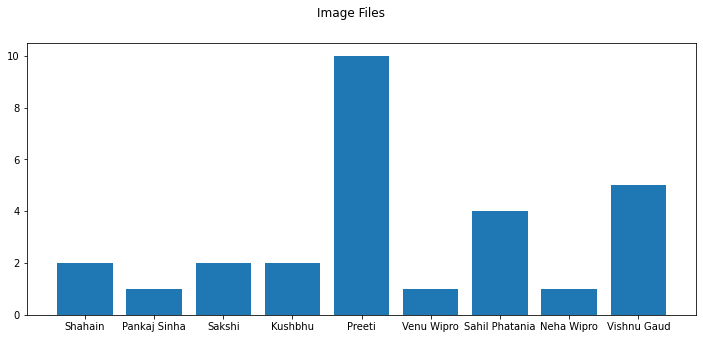

In [76]:

fig = plt.figure(figsize=(12, 5))
fig.suptitle('Image Files')
plt.bar(range(len(lname)), list(lname.values()), align='center')
plt.xticks(range(len(lname)), list(lname.keys()))
plt.show()


In [77]:
textdata[:10]

['21/12/16 9:57:45 PM: Shahain: Wow',
 '21/12/16 10:50:12 PM: Neha Wipro: Awsum',
 '21/12/16 10:51:21 PM: Sakshi:',
 '21/12/16 10:57:01 PM: Ganguly:',
 '21/12/16 11:28:51 PM: Vishnu Gaud: Waste out of wealth',
 '21/12/16 11:48:42 PM: Venu Wipro: Fancy dress competition',
 '22/12/16 12:08:04 AM: Kushbhu:',
 '22/12/16 12:24:00 AM: Messages you send to this group are now secured with endtoend encryption',
 '22/12/16 12:25:02 AM: Nautys phone: Superrrrrrr se bhiiiiiiii uperrrrrrrr',
 '22/12/16 12:36:54 AM: Sakshi: We were Divided into four groups  Each group had to use newspapers only for dressing up one of their team members']

URL finding

In [78]:
url_regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"

In [79]:
lurl = []
murldata =[] 
for line in textdata:
    url = re.findall(url_regex,line)
    if url:
        try:
            name = line.split(":")[3].strip()
            lurl.append([name,url[0][0]])
        except:
            pass
    else:
        murldata.append(line)
textdata = murldata

In [80]:
lurl

[['Kushbhu', 'http://airtelfreegprscom/'],
 ['Shahain', 'https://myoutubecom/watchvbV2GklFBaT8'],
 ['Vishnu Gaud',
  'https://wwwgooglecom/amp/mtimesofindiacom/city/bengaluru/bengalurumurdershruthiwasweepinginconsolablysaysbrother/amparticleshow/56553168cms'],
 ['Pankaj Sinha',
  'http://editioncnncom/interactive/2017/01/politics/trumpinaugurationgigapixel/cnnApp']]

In [81]:
textdata[:10]

['21/12/16 9:57:45 PM: Shahain: Wow',
 '21/12/16 10:50:12 PM: Neha Wipro: Awsum',
 '21/12/16 10:51:21 PM: Sakshi:',
 '21/12/16 10:57:01 PM: Ganguly:',
 '21/12/16 11:28:51 PM: Vishnu Gaud: Waste out of wealth',
 '21/12/16 11:48:42 PM: Venu Wipro: Fancy dress competition',
 '22/12/16 12:08:04 AM: Kushbhu:',
 '22/12/16 12:24:00 AM: Messages you send to this group are now secured with endtoend encryption',
 '22/12/16 12:25:02 AM: Nautys phone: Superrrrrrr se bhiiiiiiii uperrrrrrrr',
 '22/12/16 12:36:54 AM: Sakshi: We were Divided into four groups  Each group had to use newspapers only for dressing up one of their team members']

Unique Speakers

In [82]:
uname = []
for line in textdata:
    name = line.split(":")[3].strip()
    uname.append(name)
uname = set(uname)

In [83]:
uname

{'918548844165 left',
 '919736022813',
 '919736022813 changed to 918548844165',
 'Ganguly',
 'Kranthi',
 'Kushbhu',
 'Messages you send to this group are now secured with endtoend encryption',
 'Mukti Sharma',
 'Mukti Sharma changed the subject to Happy bday vishnu',
 'Nautys phone',
 'Neha Wipro',
 'Neha Wipro changed this groups icon',
 'Pankaj Sinha',
 'Preeti',
 'Sahil Phatania',
 'Sakshi',
 'Shahain',
 'Shradha',
 'Shweta',
 'Shweta changed the subject to Happy Birthday Sahil',
 'Shweta changed this groups icon',
 'Venu Wipro',
 'Vishnu Gaud',
 'Vishnu Gaud changed the subject to BI  Rest',
 'Vishnu Gaud changed the subject to Happy Birthday Mukti',
 'Vishnu Gaud changed the subject to Happy Birthday Preeti',
 'Vishnu Gaud changed this groups icon',
 'Yogesh Raghavan'}

In [84]:
fname = []
for name in uname:
    if not re.findall("changed|encryption|[0-9]",name):
        fname.append(name)

In [85]:
fname

['Mukti Sharma',
 'Kranthi',
 'Neha Wipro',
 'Shradha',
 'Sakshi',
 'Sahil Phatania',
 'Nautys phone',
 'Ganguly',
 'Pankaj Sinha',
 'Preeti',
 'Venu Wipro',
 'Vishnu Gaud',
 'Kushbhu',
 'Yogesh Raghavan',
 'Shahain',
 'Shweta']

Making corpous of each person

List all texts

In [86]:
corpous = {}
for line in textdata:
    name = line.split(":")[3].strip()
    if name in fname:
        try:
            temp = corpous[name]
            temp = temp + " "+line.split(":")[4].strip()
            corpous[name] = temp
        except:
            temp =  line.split(":")[4].strip()
            corpous[name] = temp
textcorpous = corpous

List all dates 

In [87]:
corpous = {}
for line in textdata:
    name = line.split(":")[3].strip()
    if name in fname:
        try:
            temp = corpous[name]
            temp = temp + " "+line.split(" ")[0].strip()
            corpous[name] = temp
        except:
            temp =  line.split(" ")[0].strip()
            corpous[name] = temp
date = corpous
for key in date.keys():
    dstr = date[key]
    date[key] = dstr.split(" ")

List all time

In [88]:
corpous = {}
for line in textdata:
    name = line.split(":")[3].strip()
    if name in fname:
        try:
            temp = corpous[name]
            temp = temp + ","+line.split(" ")[1] +" "+line.split(" ")[2].split(":")[0]
            corpous[name] = temp
        except:
            temp =  line.split(" ")[1] +" "+line.split(" ")[2].split(":")[0]
            corpous[name] = temp
time = corpous
for key in date.keys():
    dstr = time[key]
    time[key] = dstr.split(",")

NLTK

In [89]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/pulkit/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Tokenization, Lemmatization, Case Removal, StopWord Removal and Number Extration

In [90]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer

In [91]:
lemmatizer = WordNetLemmatizer()
numberdb ={}
for key in textcorpous.keys():
    data = textcorpous[key]
    tokens = word_tokenize(data)
    numbers = [word.lower() for word in tokens if not word == "" and not word.isalpha() and len(word)>3]
    tokens = [word.lower() for word in tokens if not word == "" and word.isalpha()]
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    ftokens = [word for word in lemmas if not word in stopwords.words('english')]
    textcorpous[key] = ftokens
    if numbers:
        numberdb[key] = numbers

In [92]:
numberdb

{'Neha Wipro': ['24th'],
 'Vishnu Gaud': ['919535599196', 'bha8'],
 'Pankaj Sinha': ['919736249409'],
 'Kranthi': ['nice1', 'nice1'],
 'Sahil Phatania': ['919731501182', '919535599196']}

Plot Dates

In [93]:
date_list = []
for name in date.keys():
    date_list.extend(date[name])

date_fdict = defaultdict( int )
for x in date_list:
    date_fdict[x] += 1

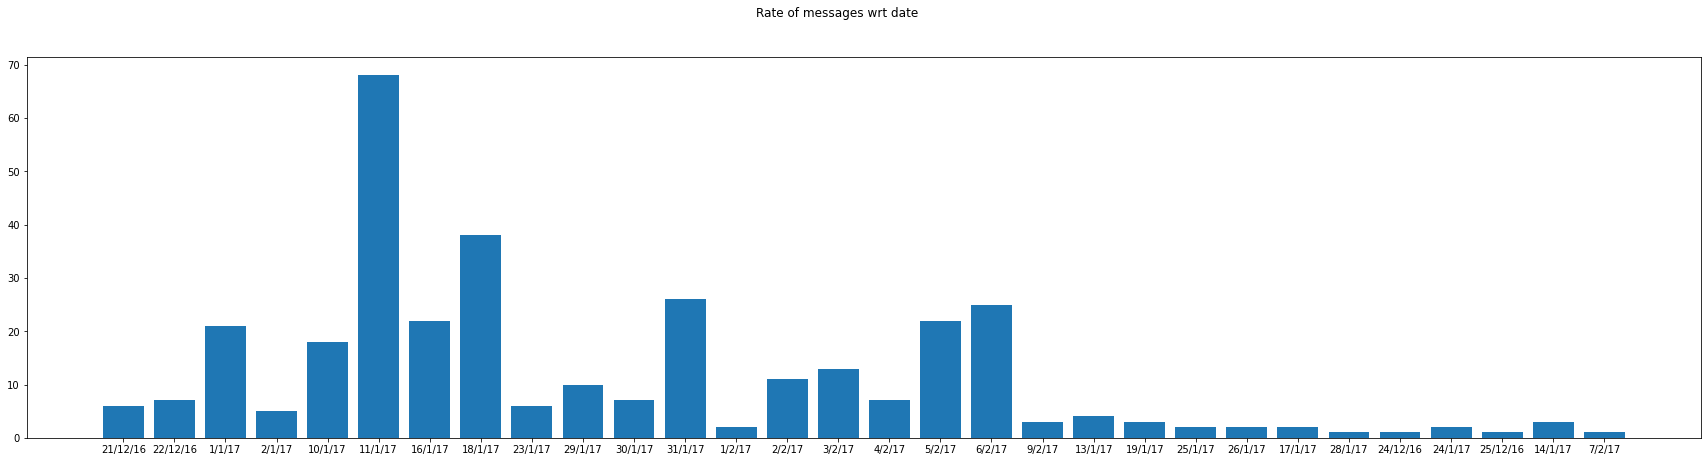

In [94]:
fig = plt.figure(figsize=(30, 7))
fig.suptitle('Rate of messages wrt date')
plt.bar(range(len(date_fdict)), list(date_fdict.values()), align='center')
plt.xticks(range(len(date_fdict)), list(date_fdict.keys()))
plt.show()

Plot Time

In [43]:
time_list = []
for name in time.keys():
    time_list.extend(time[name])

In [44]:
hh_list = []
for tz in time_list:    
    ap = tz.split(":")[2].split()[1]
    hh = tz.split(":")[0]
    hh_list.append(hh+" "+ap)


time_fdict = defaultdict( int )
for x in hh_list:
    time_fdict[x] += 1

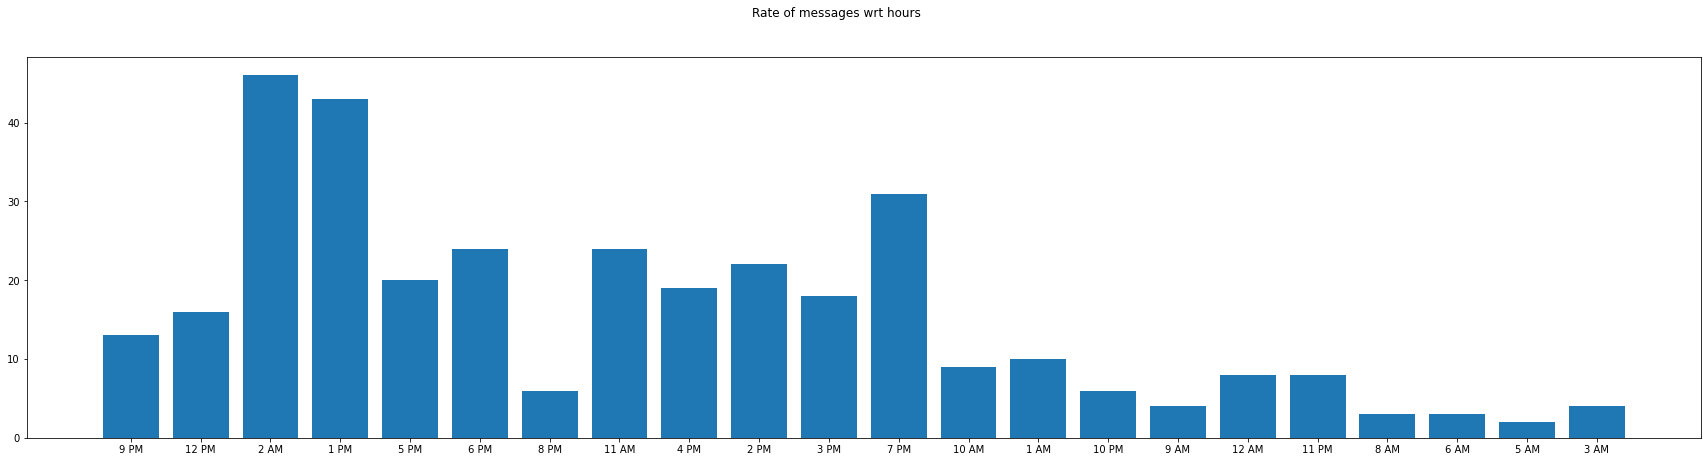

In [45]:
fig = plt.figure(figsize=(30, 7))
fig.suptitle('Rate of messages wrt hours')
plt.bar(range(len(time_fdict)), list(time_fdict.values()), align='center')
plt.xticks(range(len(time_fdict)), list(time_fdict.keys()))
plt.show()

Plot emojis

In [46]:
emo_list = []
for line,emojis in emodata:
    if len(emojis)>1:
        lemoji = []
        for x in emojis:
            lemoji.extend(list(x))
    else:
        lemoji = list(emojis[0])
    emo_list.extend(lemoji)


In [47]:
emo_freq_dict = defaultdict( int )
for emoji in emo_list:
    emo_freq_dict[emoji] += 1

In [48]:
import emoji
emo_freq_dict_wrd = {}
for key in emo_freq_dict.keys():
    name = emoji.demojize(key).strip(":")
    emo_freq_dict_wrd[name] = emo_freq_dict[key]

In [49]:
emo_freq_dict_wrd = {k: v for k, v in sorted(emo_freq_dict_wrd.items(), key=lambda item: item[1])}
keys = list(emo_freq_dict_wrd.keys())
keys[-10:]

['party_popper',
 'thumbs_up',
 'grinning_face',
 'squinting_face_with_tongue',
 'beaming_face_with_smiling_eyes',
 'birthday_cake',
 'musical_note',
 'winking_face_with_tongue',
 'smiling_face_with_smiling_eyes',
 'face_with_tears_of_joy']

In [50]:
emo_freq_dict_final = {}
for key in keys[-10:]:
    emo_freq_dict_final[key] = emo_freq_dict_wrd[key]

In [51]:
femoji = []
for key in keys[-10:]:
    emo = emoji.emojize(":"+key+":")
    femoji.append(emo)
femoji[::-1]

['😂', '😊', '😜', '🎵', '🎂', '😁', '😝', '😀', '👍', '🎉']

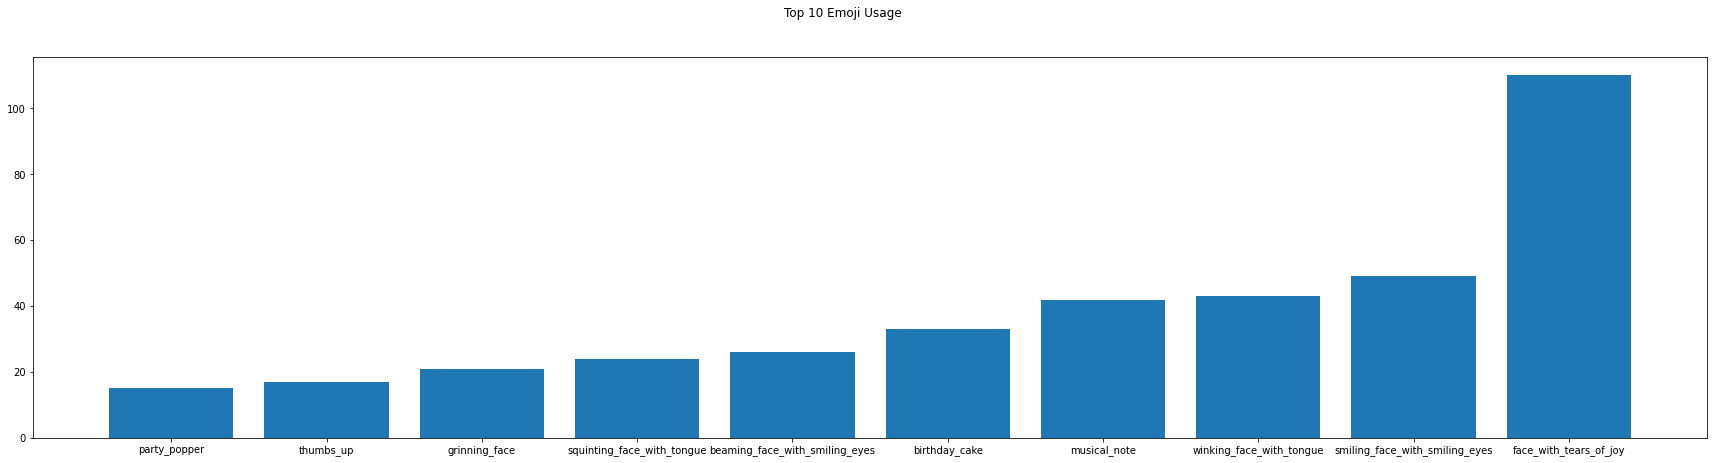

In [52]:
fig = plt.figure(figsize=(30, 7))
fig.suptitle('Top 10 Emoji Usage')
plt.bar(range(len(emo_freq_dict_final)), list(emo_freq_dict_final.values()), align='center')
plt.xticks(range(len(emo_freq_dict_final)), list(emo_freq_dict_final.keys()))
plt.show()

Word Cloud for each person

In [53]:
from wordcloud import WordCloud

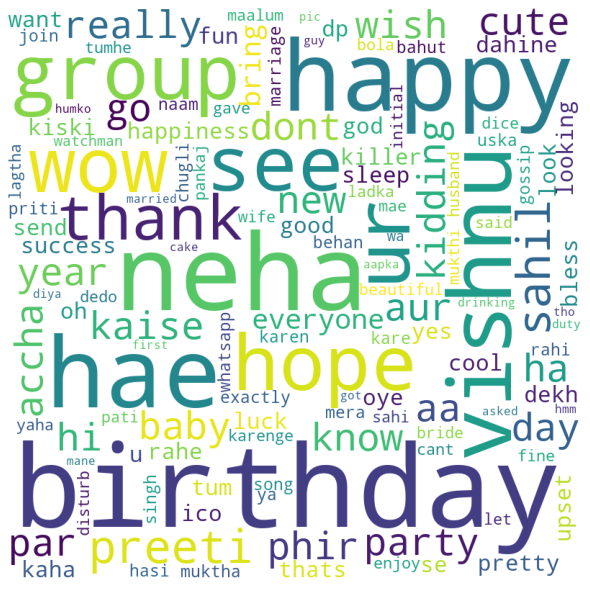

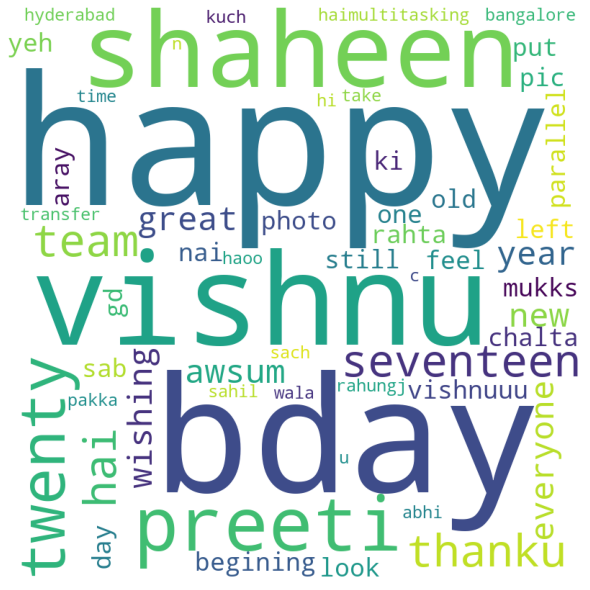

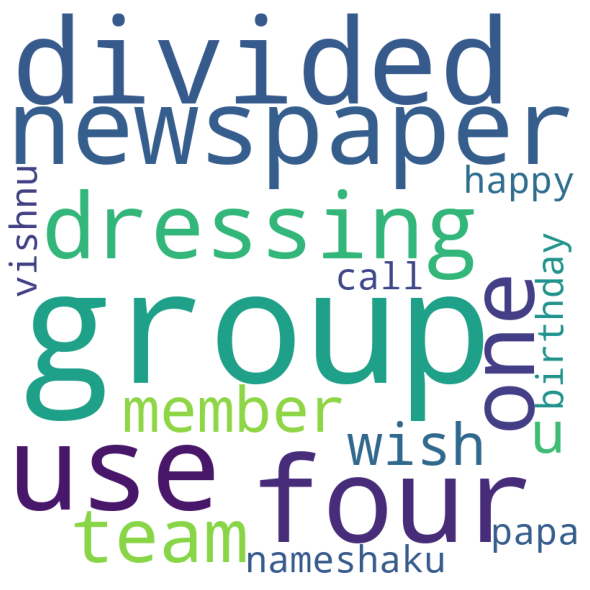

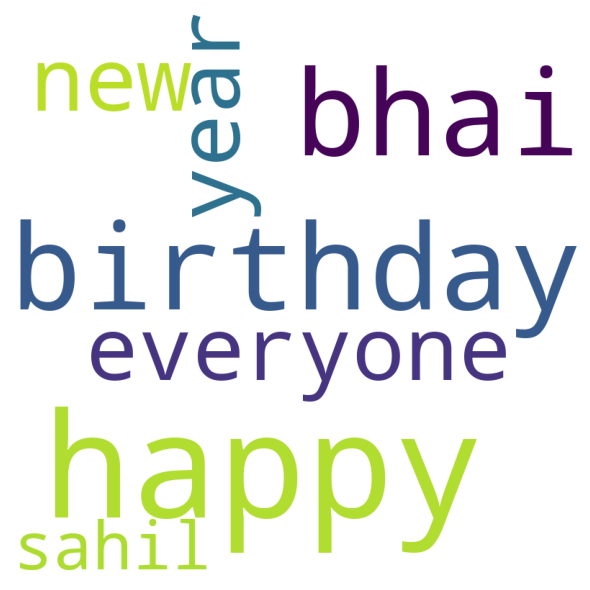

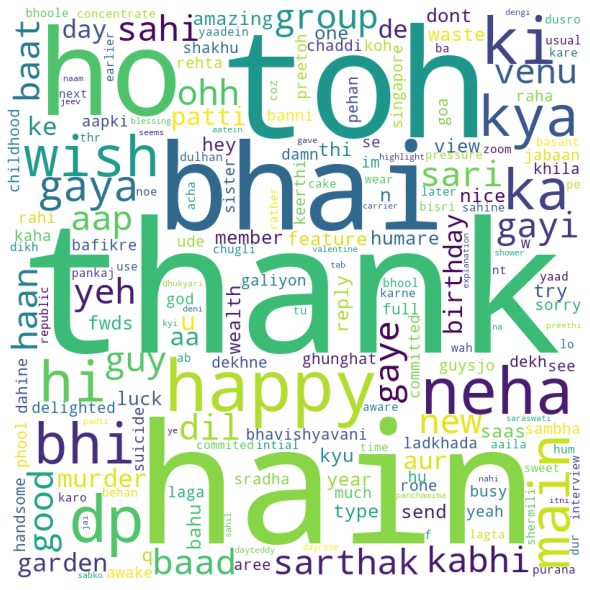

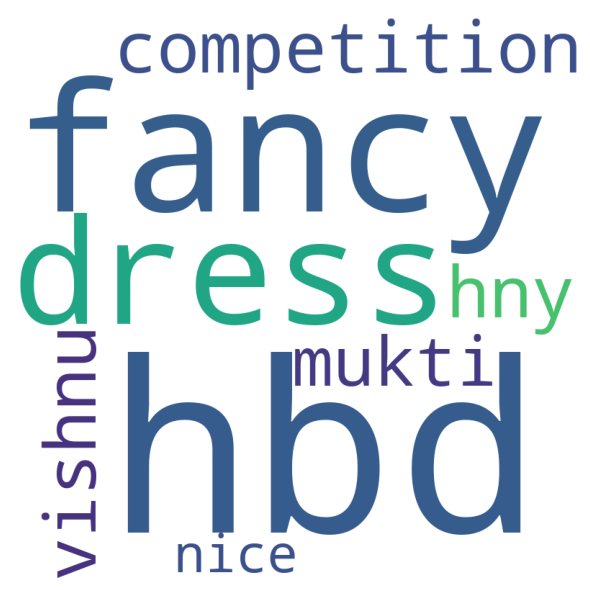

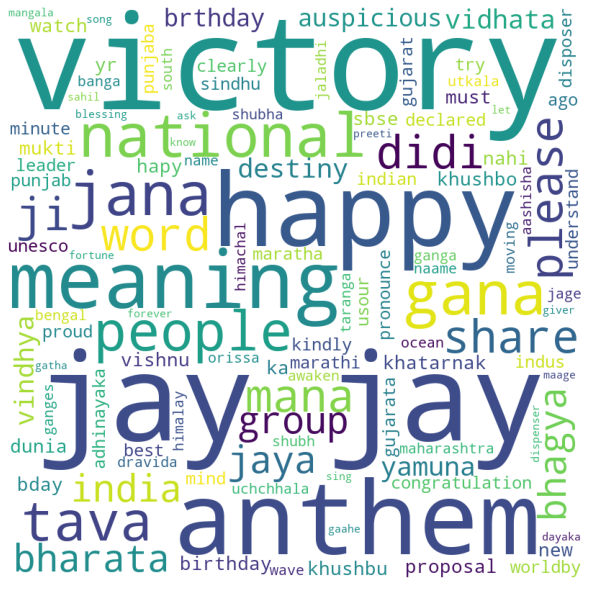

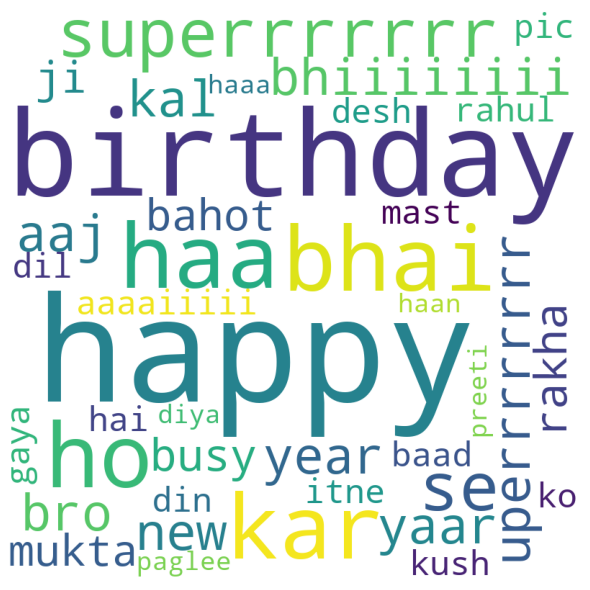

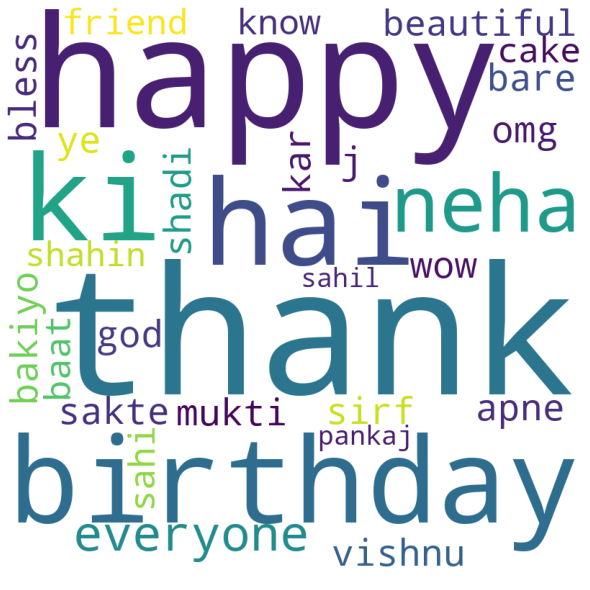

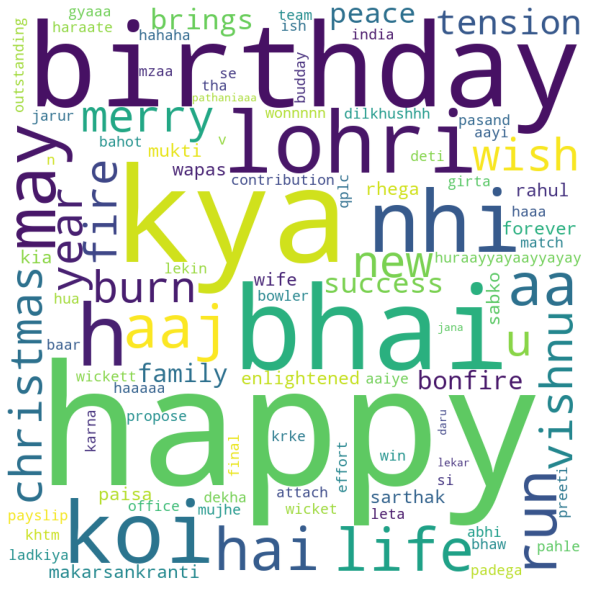

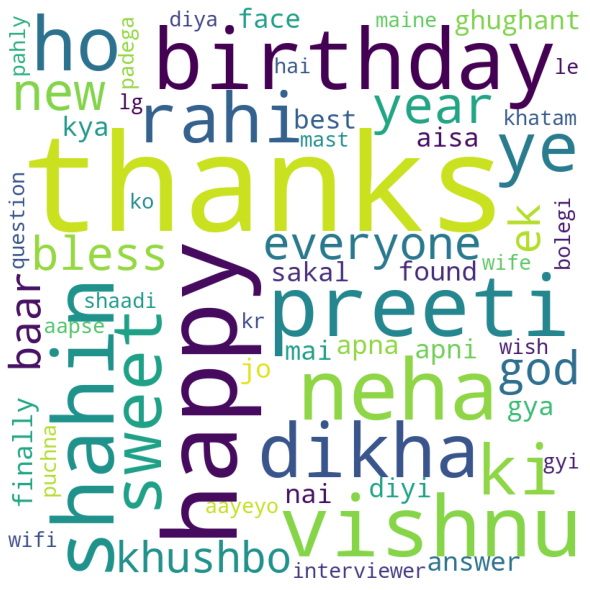

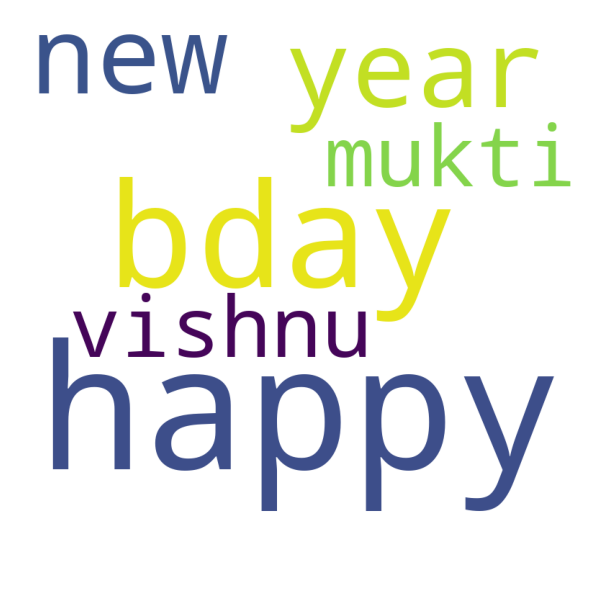

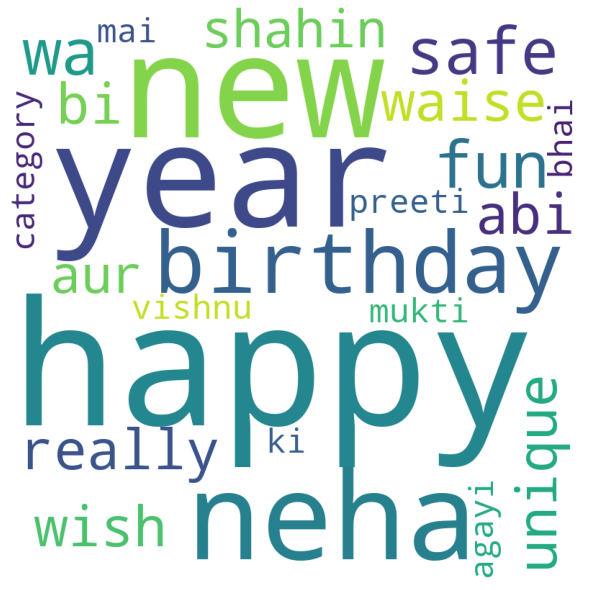

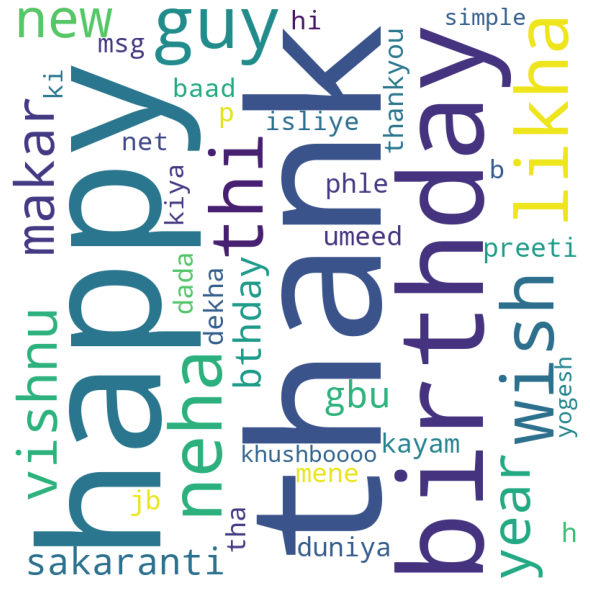

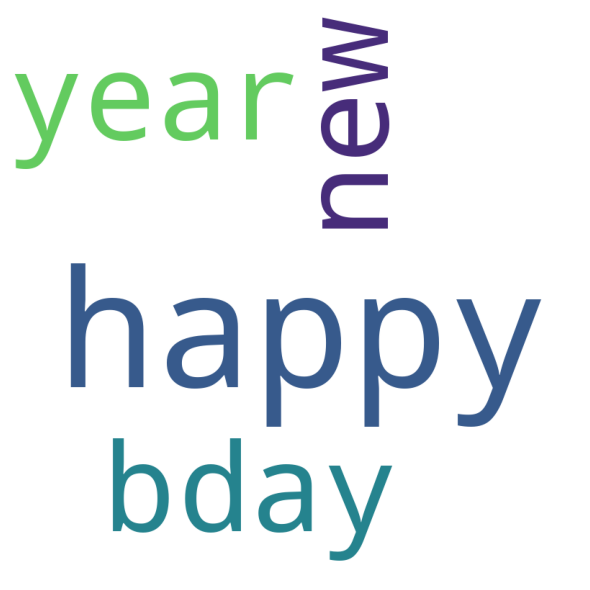

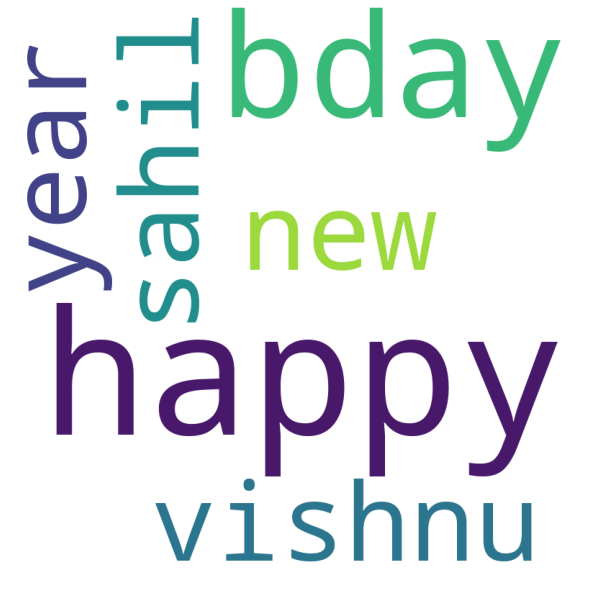

In [54]:
for key in textcorpous.keys():
    data = textcorpous[key]
    cloud_vec =  " ".join(x for x in data)   
    wordcloud = WordCloud(width = 800, height = 800,background_color ='white', min_font_size = 10).generate(cloud_vec) 
    
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    
    plt.show()